#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns

import matplotlib.pyplot as plt

#### Load Data

In [2]:
flight_delay_data = pd.read_csv('../data/processed/flight_delay_dataset.csv')

In [3]:
flight_delay_data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_WAC,DEST_AIRPORT_ID,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,2022,3,8,1,1,2022-08-01,10397,ATL,34,11057,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
1,2022,3,8,1,1,2022-08-01,10397,ATL,34,11697,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
2,2022,3,8,1,1,2022-08-01,10397,ATL,34,12264,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
3,2022,3,8,1,1,2022-08-01,10397,ATL,34,12889,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
4,2022,3,8,1,1,2022-08-01,10397,ATL,34,13204,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664117,2021,3,9,30,4,2021-09-30,14771,SFO,91,12892,...,21.1,0.0,NaN,44.0,FEW:02 60.96,1013.21,16.09,300,0.0,6.0
1664118,2021,3,9,30,4,2021-09-30,14771,SFO,91,12889,...,17.2,0.0,NaN,68.0,CLR:00,1013.55,16.09,290,0.0,4.0
1664119,2021,3,9,30,4,2021-09-30,14771,SFO,91,12892,...,17.2,0.0,NaN,68.0,CLR:00,1013.55,16.09,290,0.0,4.0
1664120,2021,3,9,30,4,2021-09-30,14771,SFO,91,12892,...,17.2,0.0,NaN,68.0,CLR:00,1013.55,16.09,290,0.0,4.0


In [17]:
flight_delay_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664122 entries, 0 to 1664121
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YEAR                       1664122 non-null  int64  
 1   QUARTER                    1664122 non-null  int64  
 2   MONTH                      1664122 non-null  int64  
 3   DAY_OF_MONTH               1664122 non-null  int64  
 4   DAY_OF_WEEK                1664122 non-null  int64  
 5   FL_DATE                    1664122 non-null  object 
 6   ORIGIN_AIRPORT_ID          1664122 non-null  int64  
 7   ORIGIN                     1664122 non-null  object 
 8   ORIGIN_WAC                 1664122 non-null  int64  
 9   DEST_AIRPORT_ID            1664122 non-null  int64  
 10  DEST                       1664122 non-null  object 
 11  DEST_WAC                   1664122 non-null  int64  
 12  CRS_DEP_TIME               1664122 non-null  int64  
 13  DEP_DELAY_NE

#### Missing Data

<Axes: >

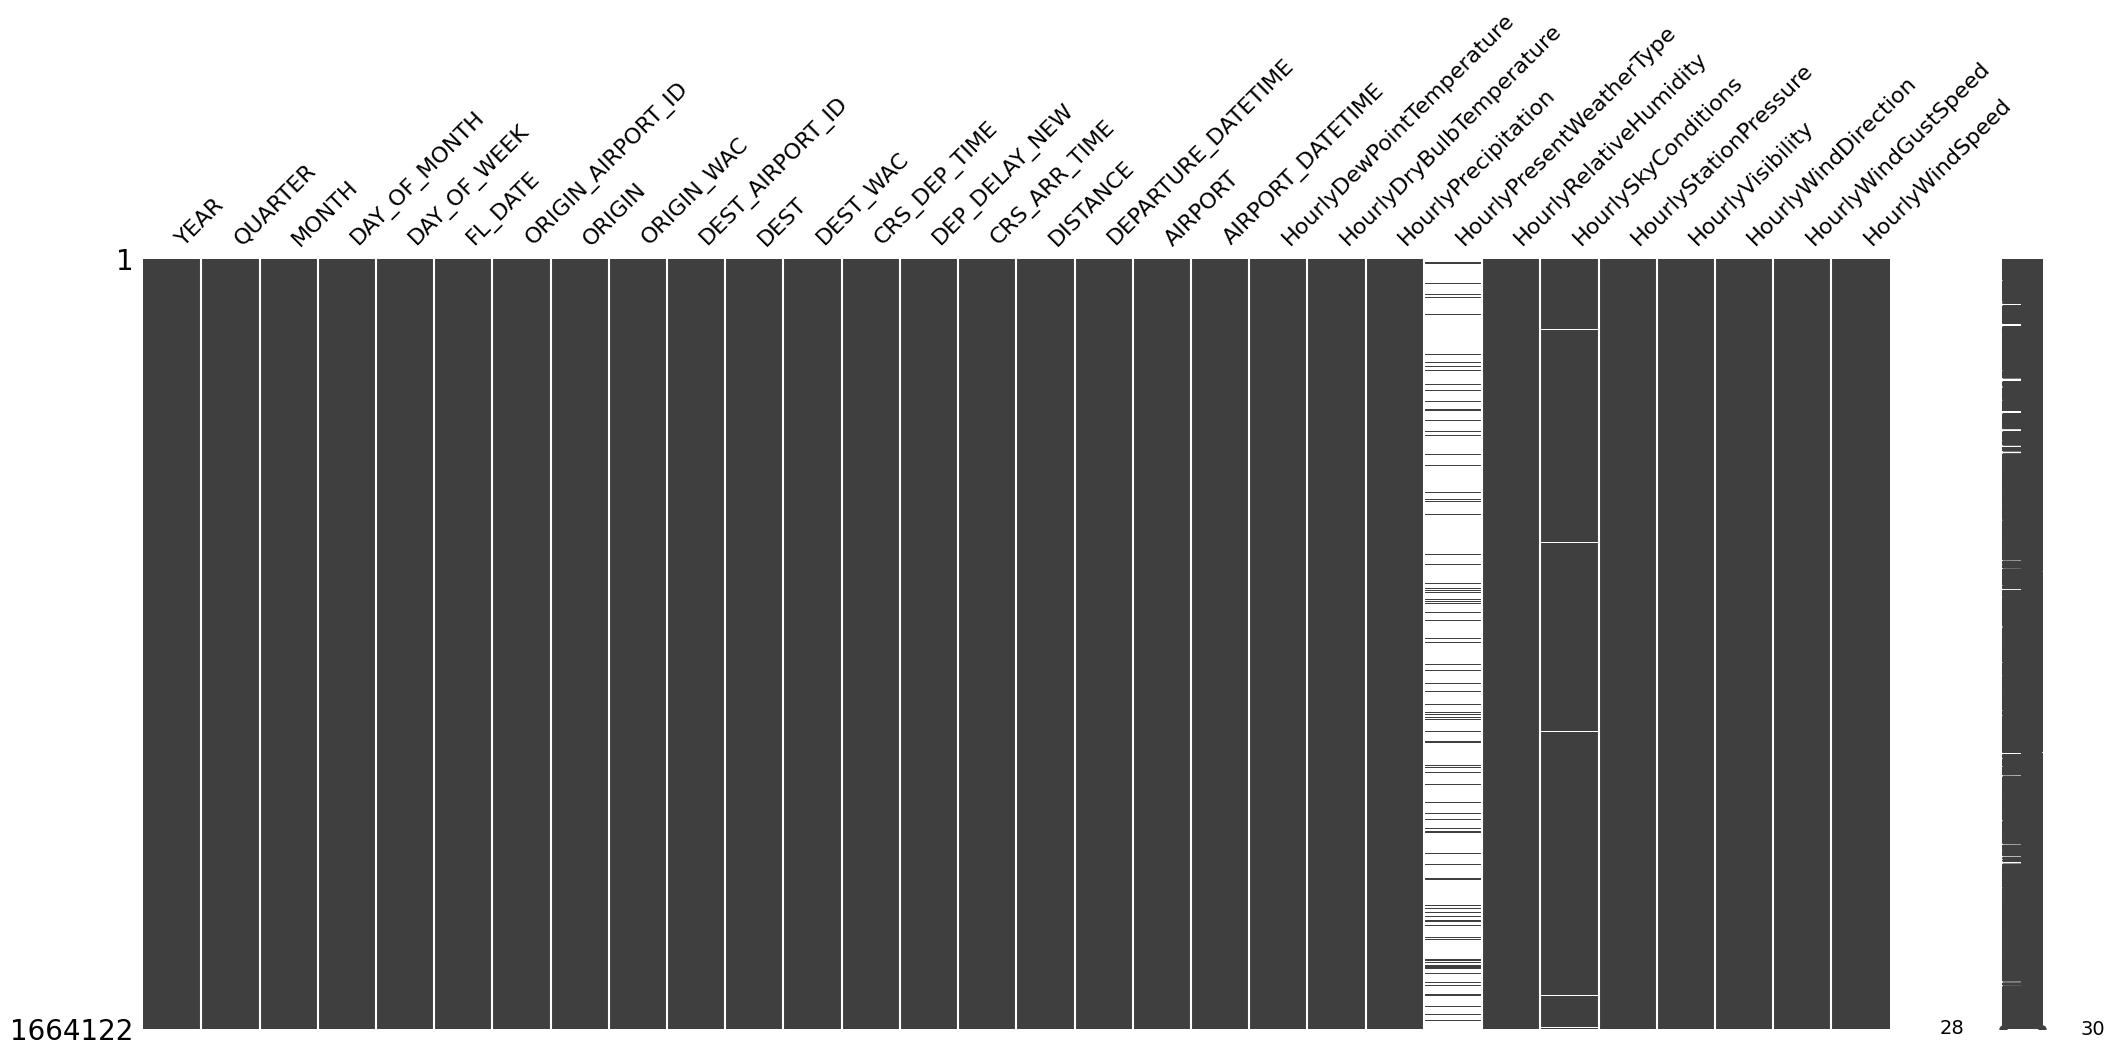

In [18]:
msno.matrix(flight_delay_data)

#### PREPROCESSING: Remove object type columns for location, date and time since they are encoded numerically already.
ORIGIN_WAC/DEST_WAC encodes the origin and destination US state according to world area code.

YEAR, MONTH and DAY_OF_WEEK/MONTH columns encodes the date

CRS_DEP_TIME and CRS_ARR_TIME encodes the scheduled departure and arrival times



TO BE DONE: HourlyPresentWeatherType,HourlySkyConditions needs to be encoded haven't done that yet. Also need to handle missing values for those columns 

In [19]:
data_numeric=flight_delay_data.copy()
data_numeric.drop(columns=['FL_DATE','DEST','ORIGIN','DEPARTURE_DATETIME','AIRPORT','AIRPORT_DATETIME','HourlyPresentWeatherType','HourlySkyConditions'], inplace=True)


In [20]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664122 entries, 0 to 1664121
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YEAR                       1664122 non-null  int64  
 1   QUARTER                    1664122 non-null  int64  
 2   MONTH                      1664122 non-null  int64  
 3   DAY_OF_MONTH               1664122 non-null  int64  
 4   DAY_OF_WEEK                1664122 non-null  int64  
 5   ORIGIN_AIRPORT_ID          1664122 non-null  int64  
 6   ORIGIN_WAC                 1664122 non-null  int64  
 7   DEST_AIRPORT_ID            1664122 non-null  int64  
 8   DEST_WAC                   1664122 non-null  int64  
 9   CRS_DEP_TIME               1664122 non-null  int64  
 10  DEP_DELAY_NEW              1664122 non-null  float64
 11  CRS_ARR_TIME               1664122 non-null  int64  
 12  DISTANCE                   1664122 non-null  float64
 13  HourlyDewPoi

#### EDA

First let's move target variable to the end so that it is easier to find in the eda plots. Our target variable is DEP_DELAY_NEW which shows departure delay in minutes(it shows 0 for early departures)

In [21]:
target_variable_column = data_numeric['DEP_DELAY_NEW']  # Select the column to move

# Create a DataFrame without the column to be moved
df_without_column = data_numeric.drop('DEP_DELAY_NEW', axis=1)

# Append the column to the end of the DataFrame
data_numeric = pd.concat([df_without_column, target_variable_column], axis=1)

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'QUARTER'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY_OF_MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'ORIGIN_AIRPORT_ID'}>,
        <Axes: title={'center': 'ORIGIN_WAC'}>,
        <Axes: title={'center': 'DEST_AIRPORT_ID'}>,
        <Axes: title={'center': 'DEST_WAC'}>,
        <Axes: title={'center': 'CRS_DEP_TIME'}>],
       [<Axes: title={'center': 'CRS_ARR_TIME'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'HourlyDewPointTemperature'}>,
        <Axes: title={'center': 'HourlyDryBulbTemperature'}>,
        <Axes: title={'center': 'HourlyPrecipitation'}>],
       [<Axes: title={'center': 'HourlyRelativeHumidity'}>,
        <Axes: title={'center': 'HourlyStationPressure'}>,
        <Axes: title={'center': 'HourlyVisibility'}>,
        <Axes: title={'center': 'HourlyWindDirection'}>,
        

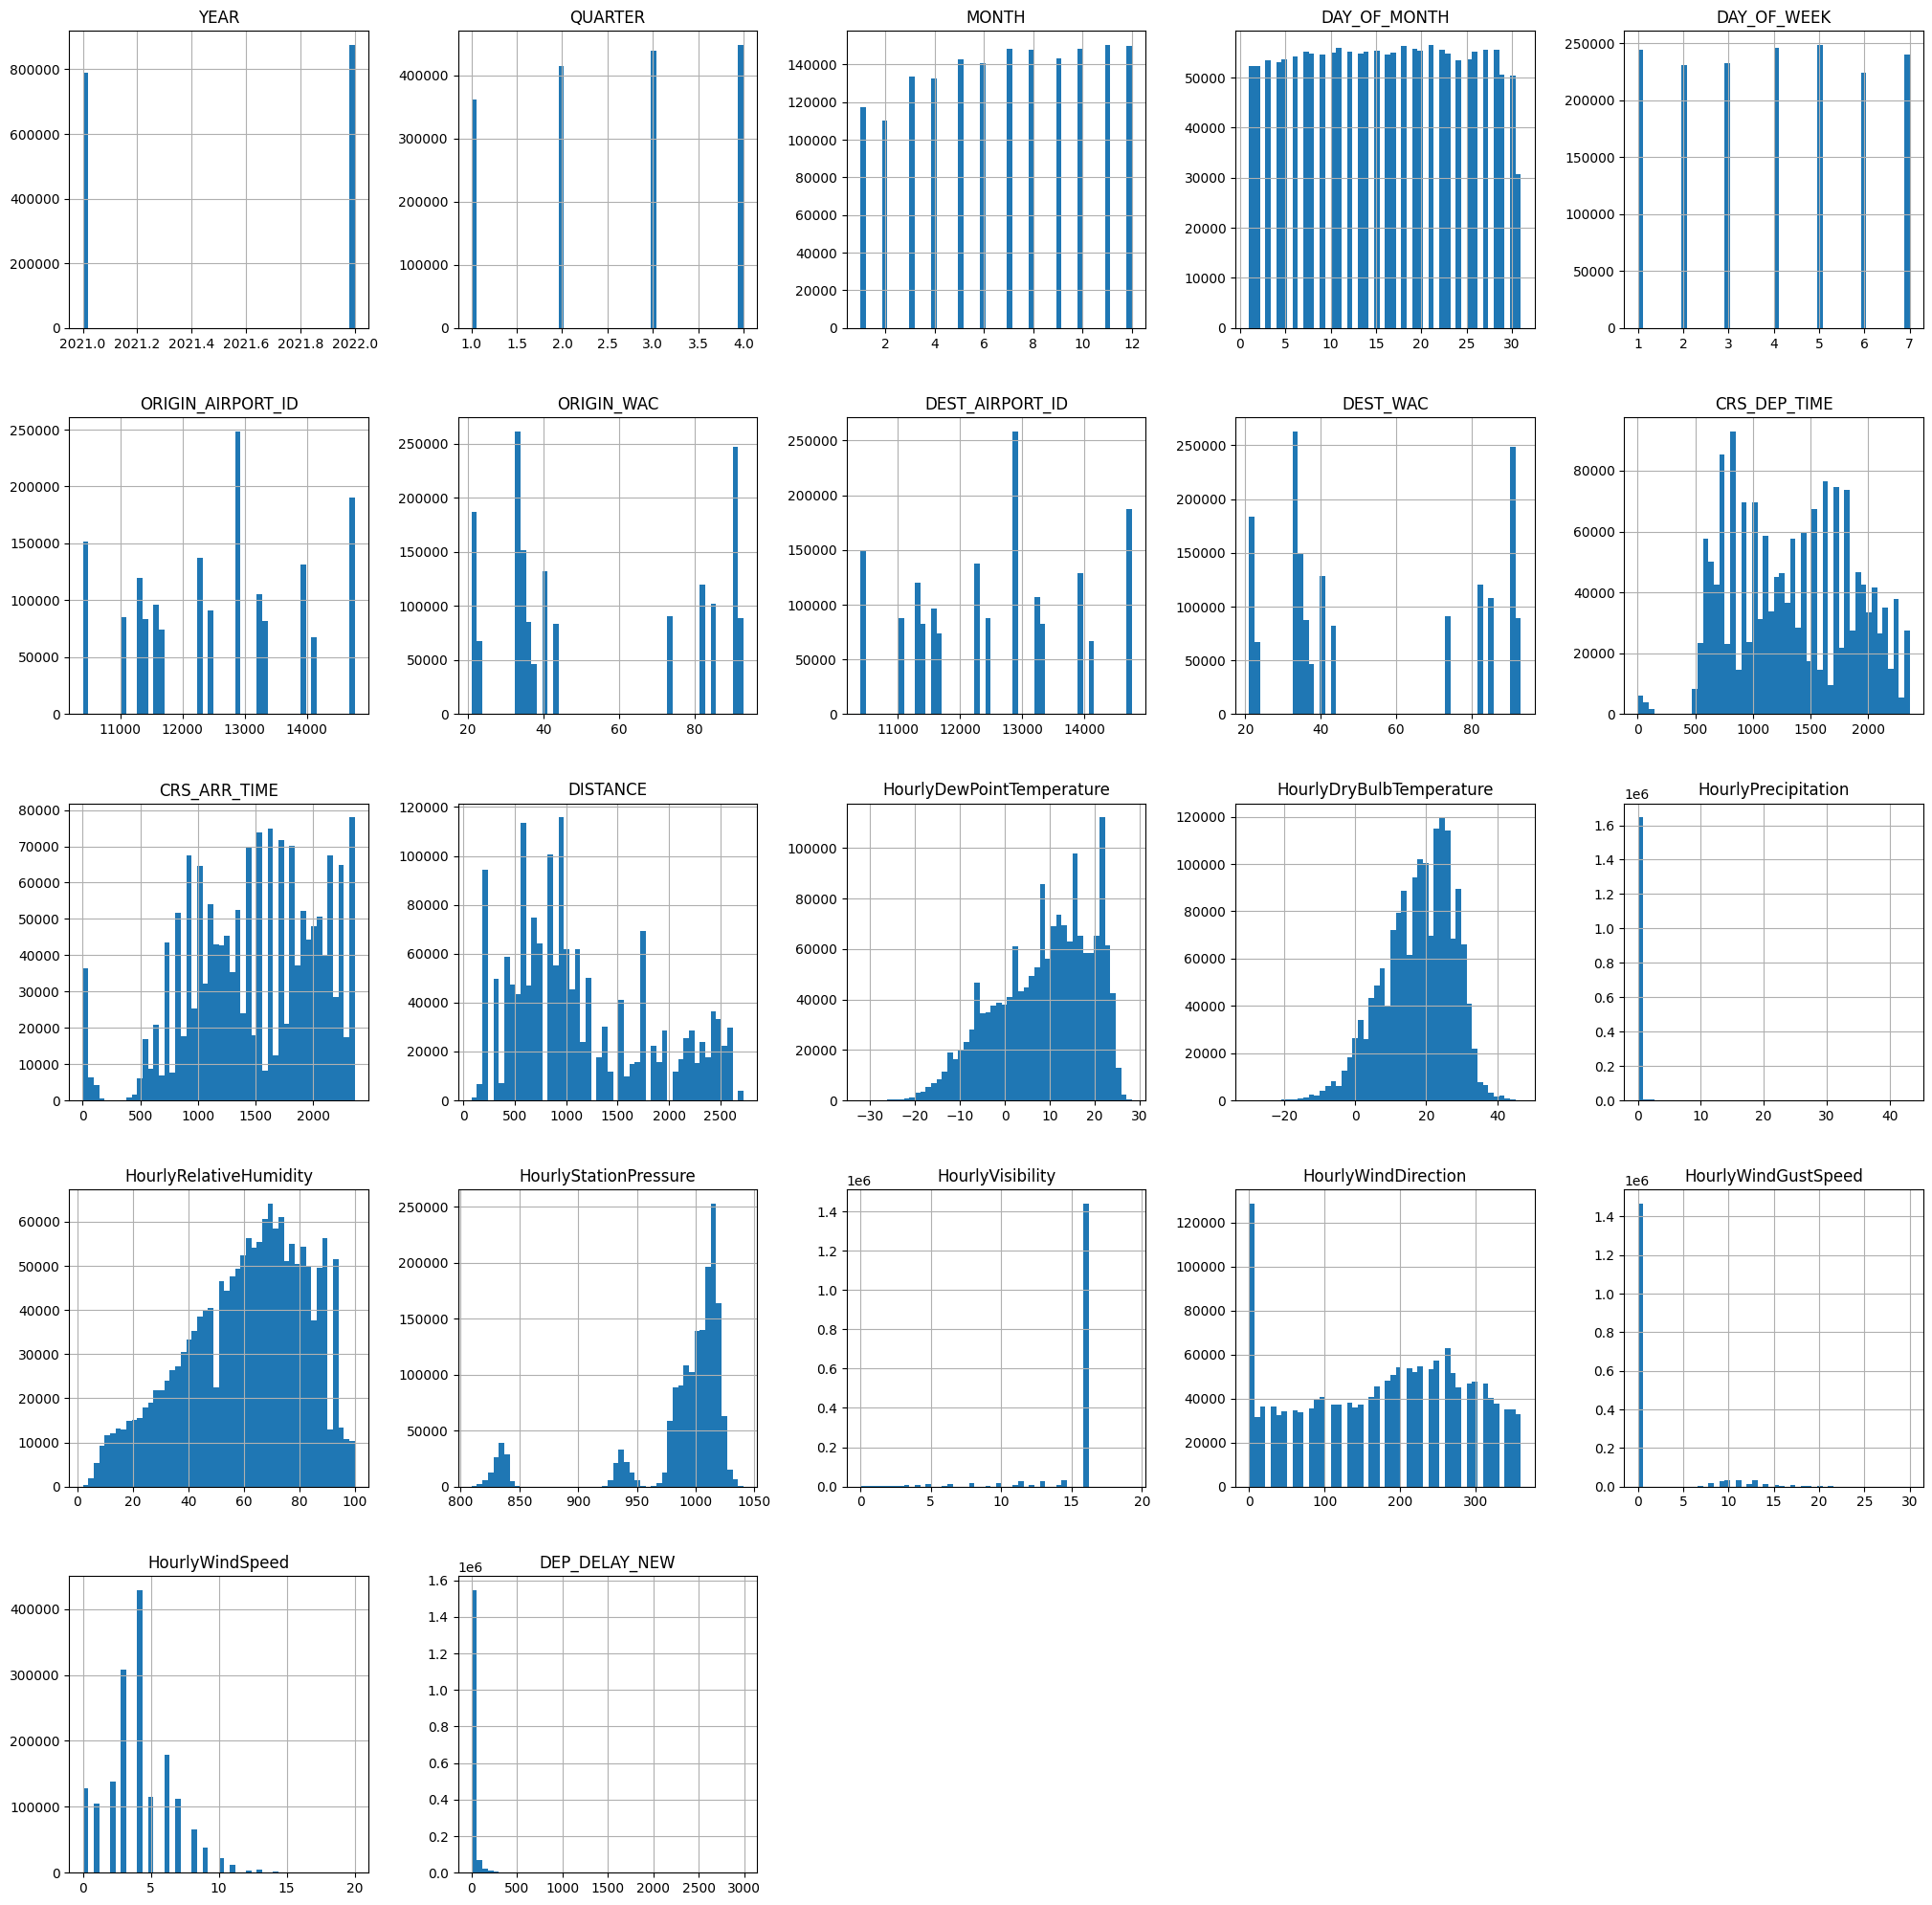

In [22]:
data_numeric.hist(figsize=(25, 25), bins=50)

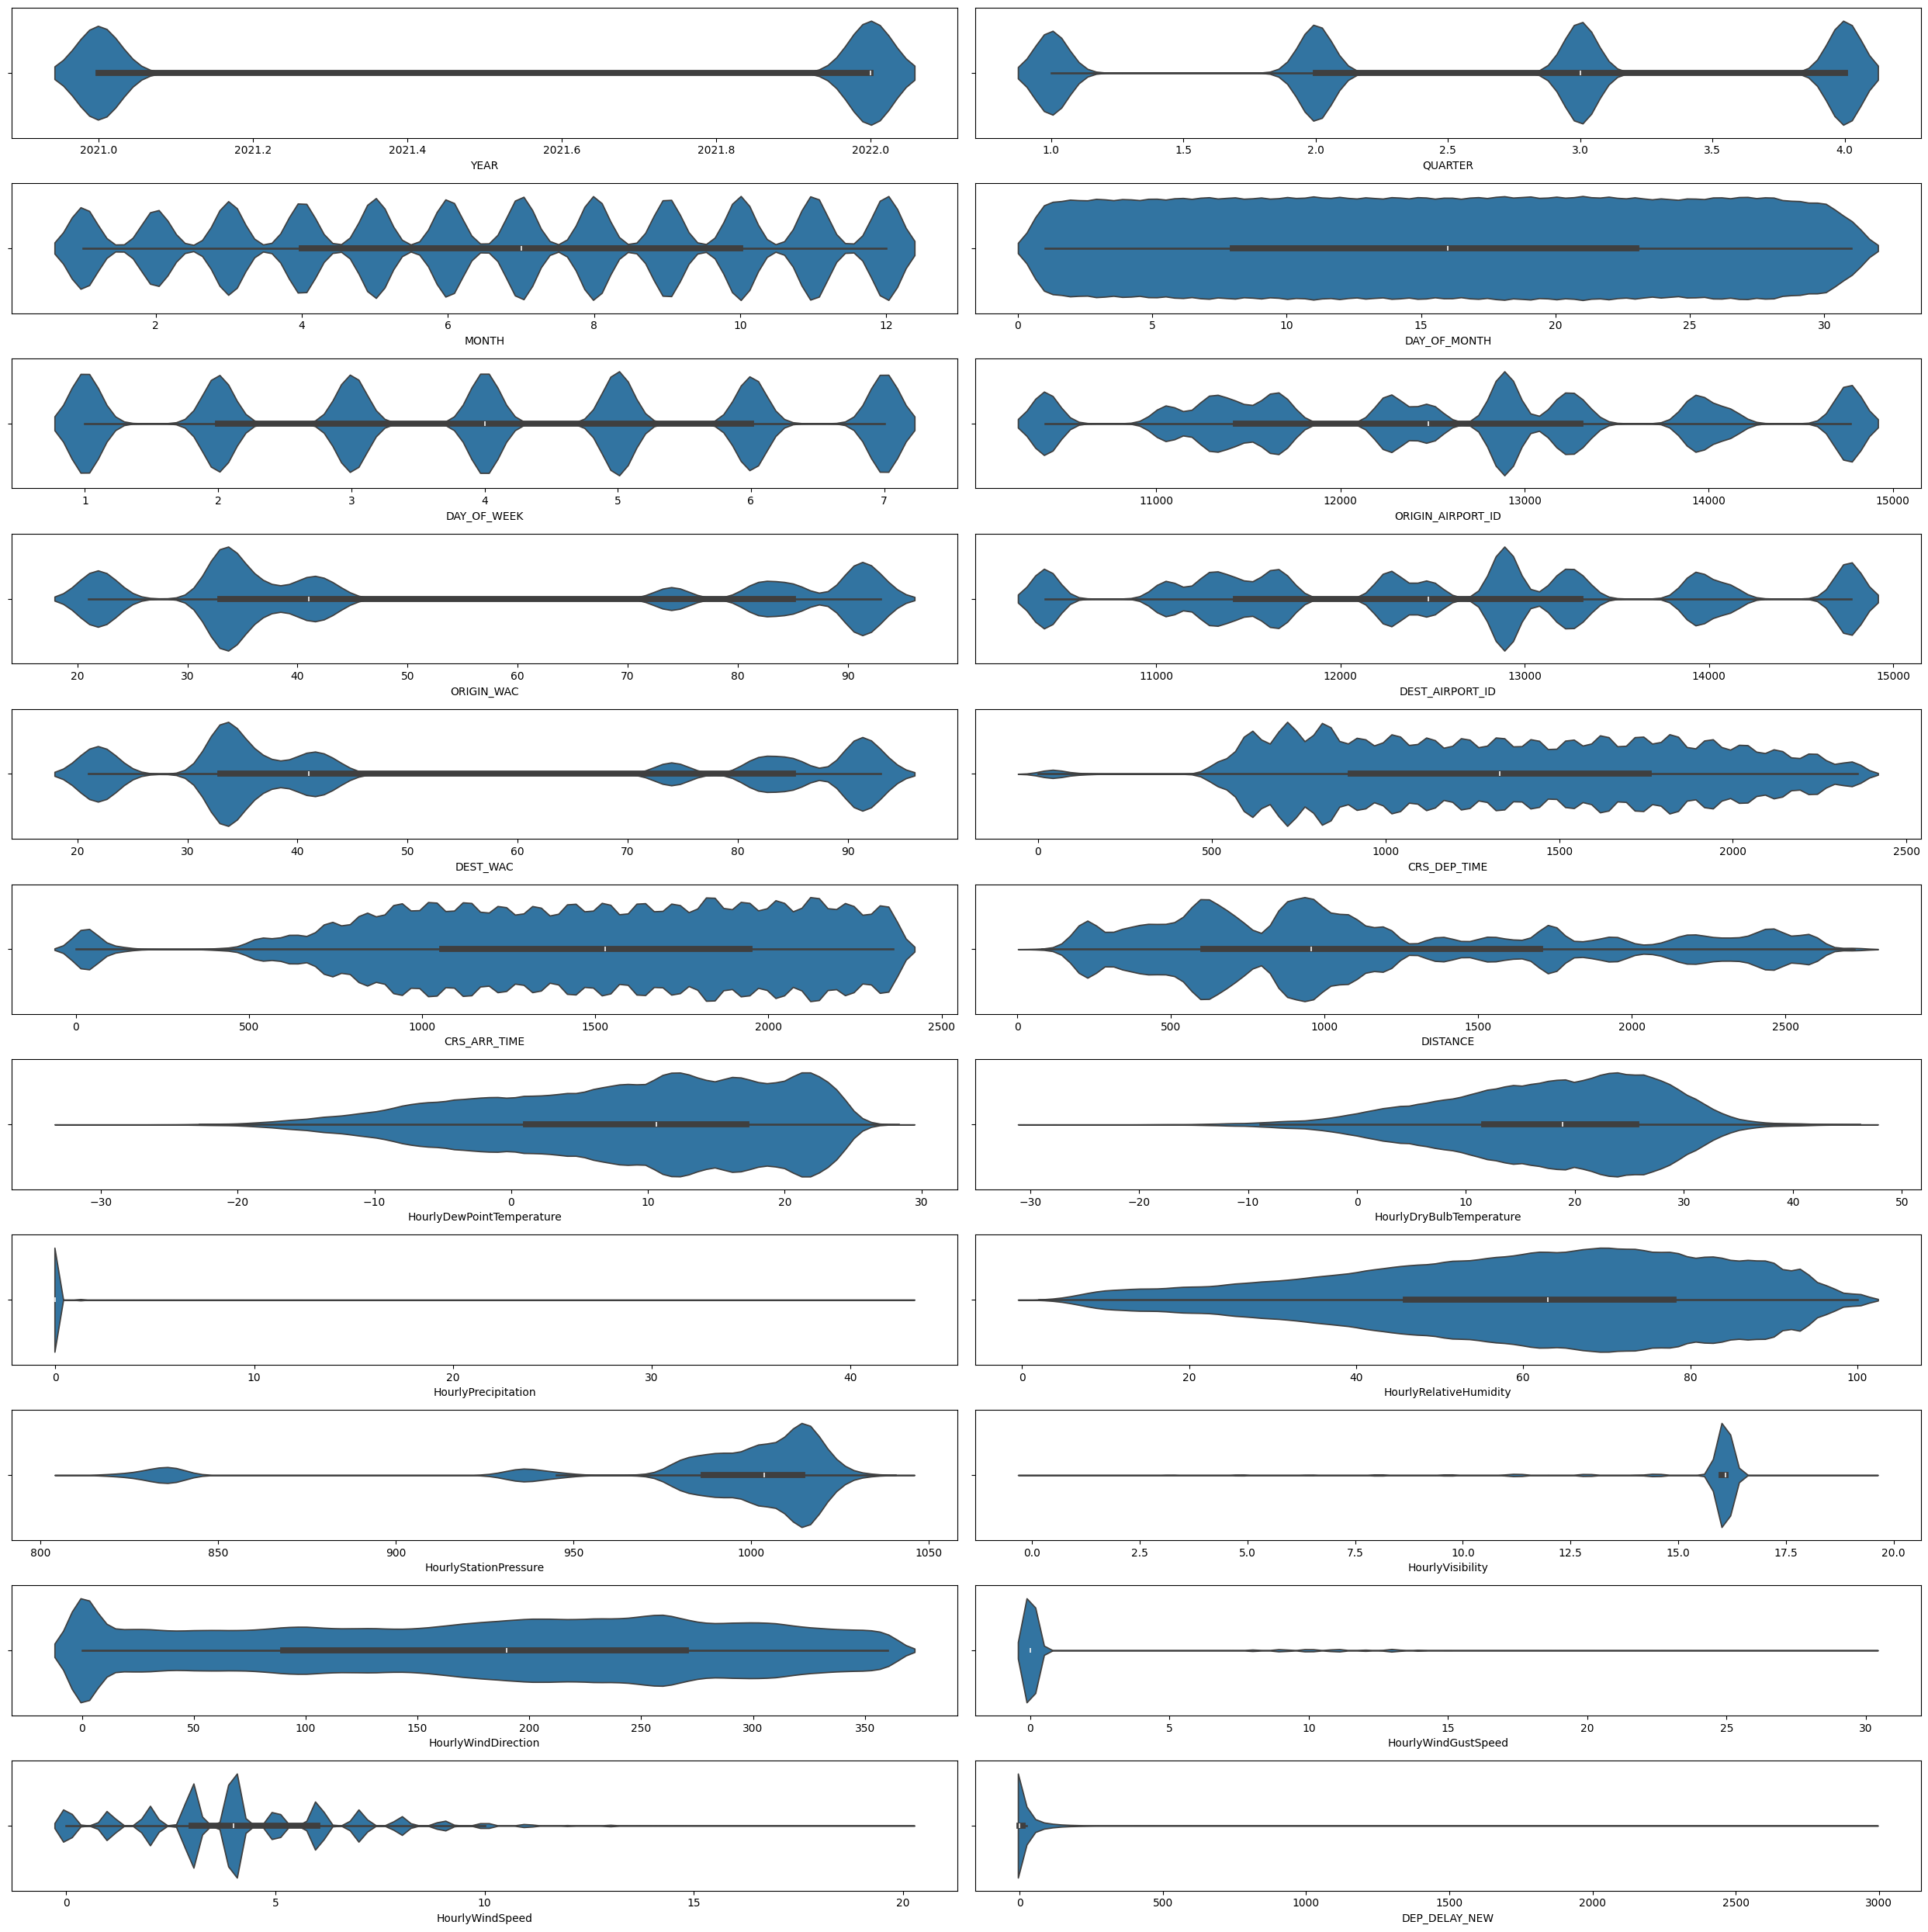

In [23]:
# violin plots using seaborn for the range of values for each feature in seperate plots
fig, axes = plt.subplots(11, 2, figsize=(25, 25))

axes = axes.flatten()
for i, col in enumerate(data_numeric.columns):
    sns.violinplot(x=col, data=data_numeric, ax=axes[i])

plt.tight_layout()
plt.show()

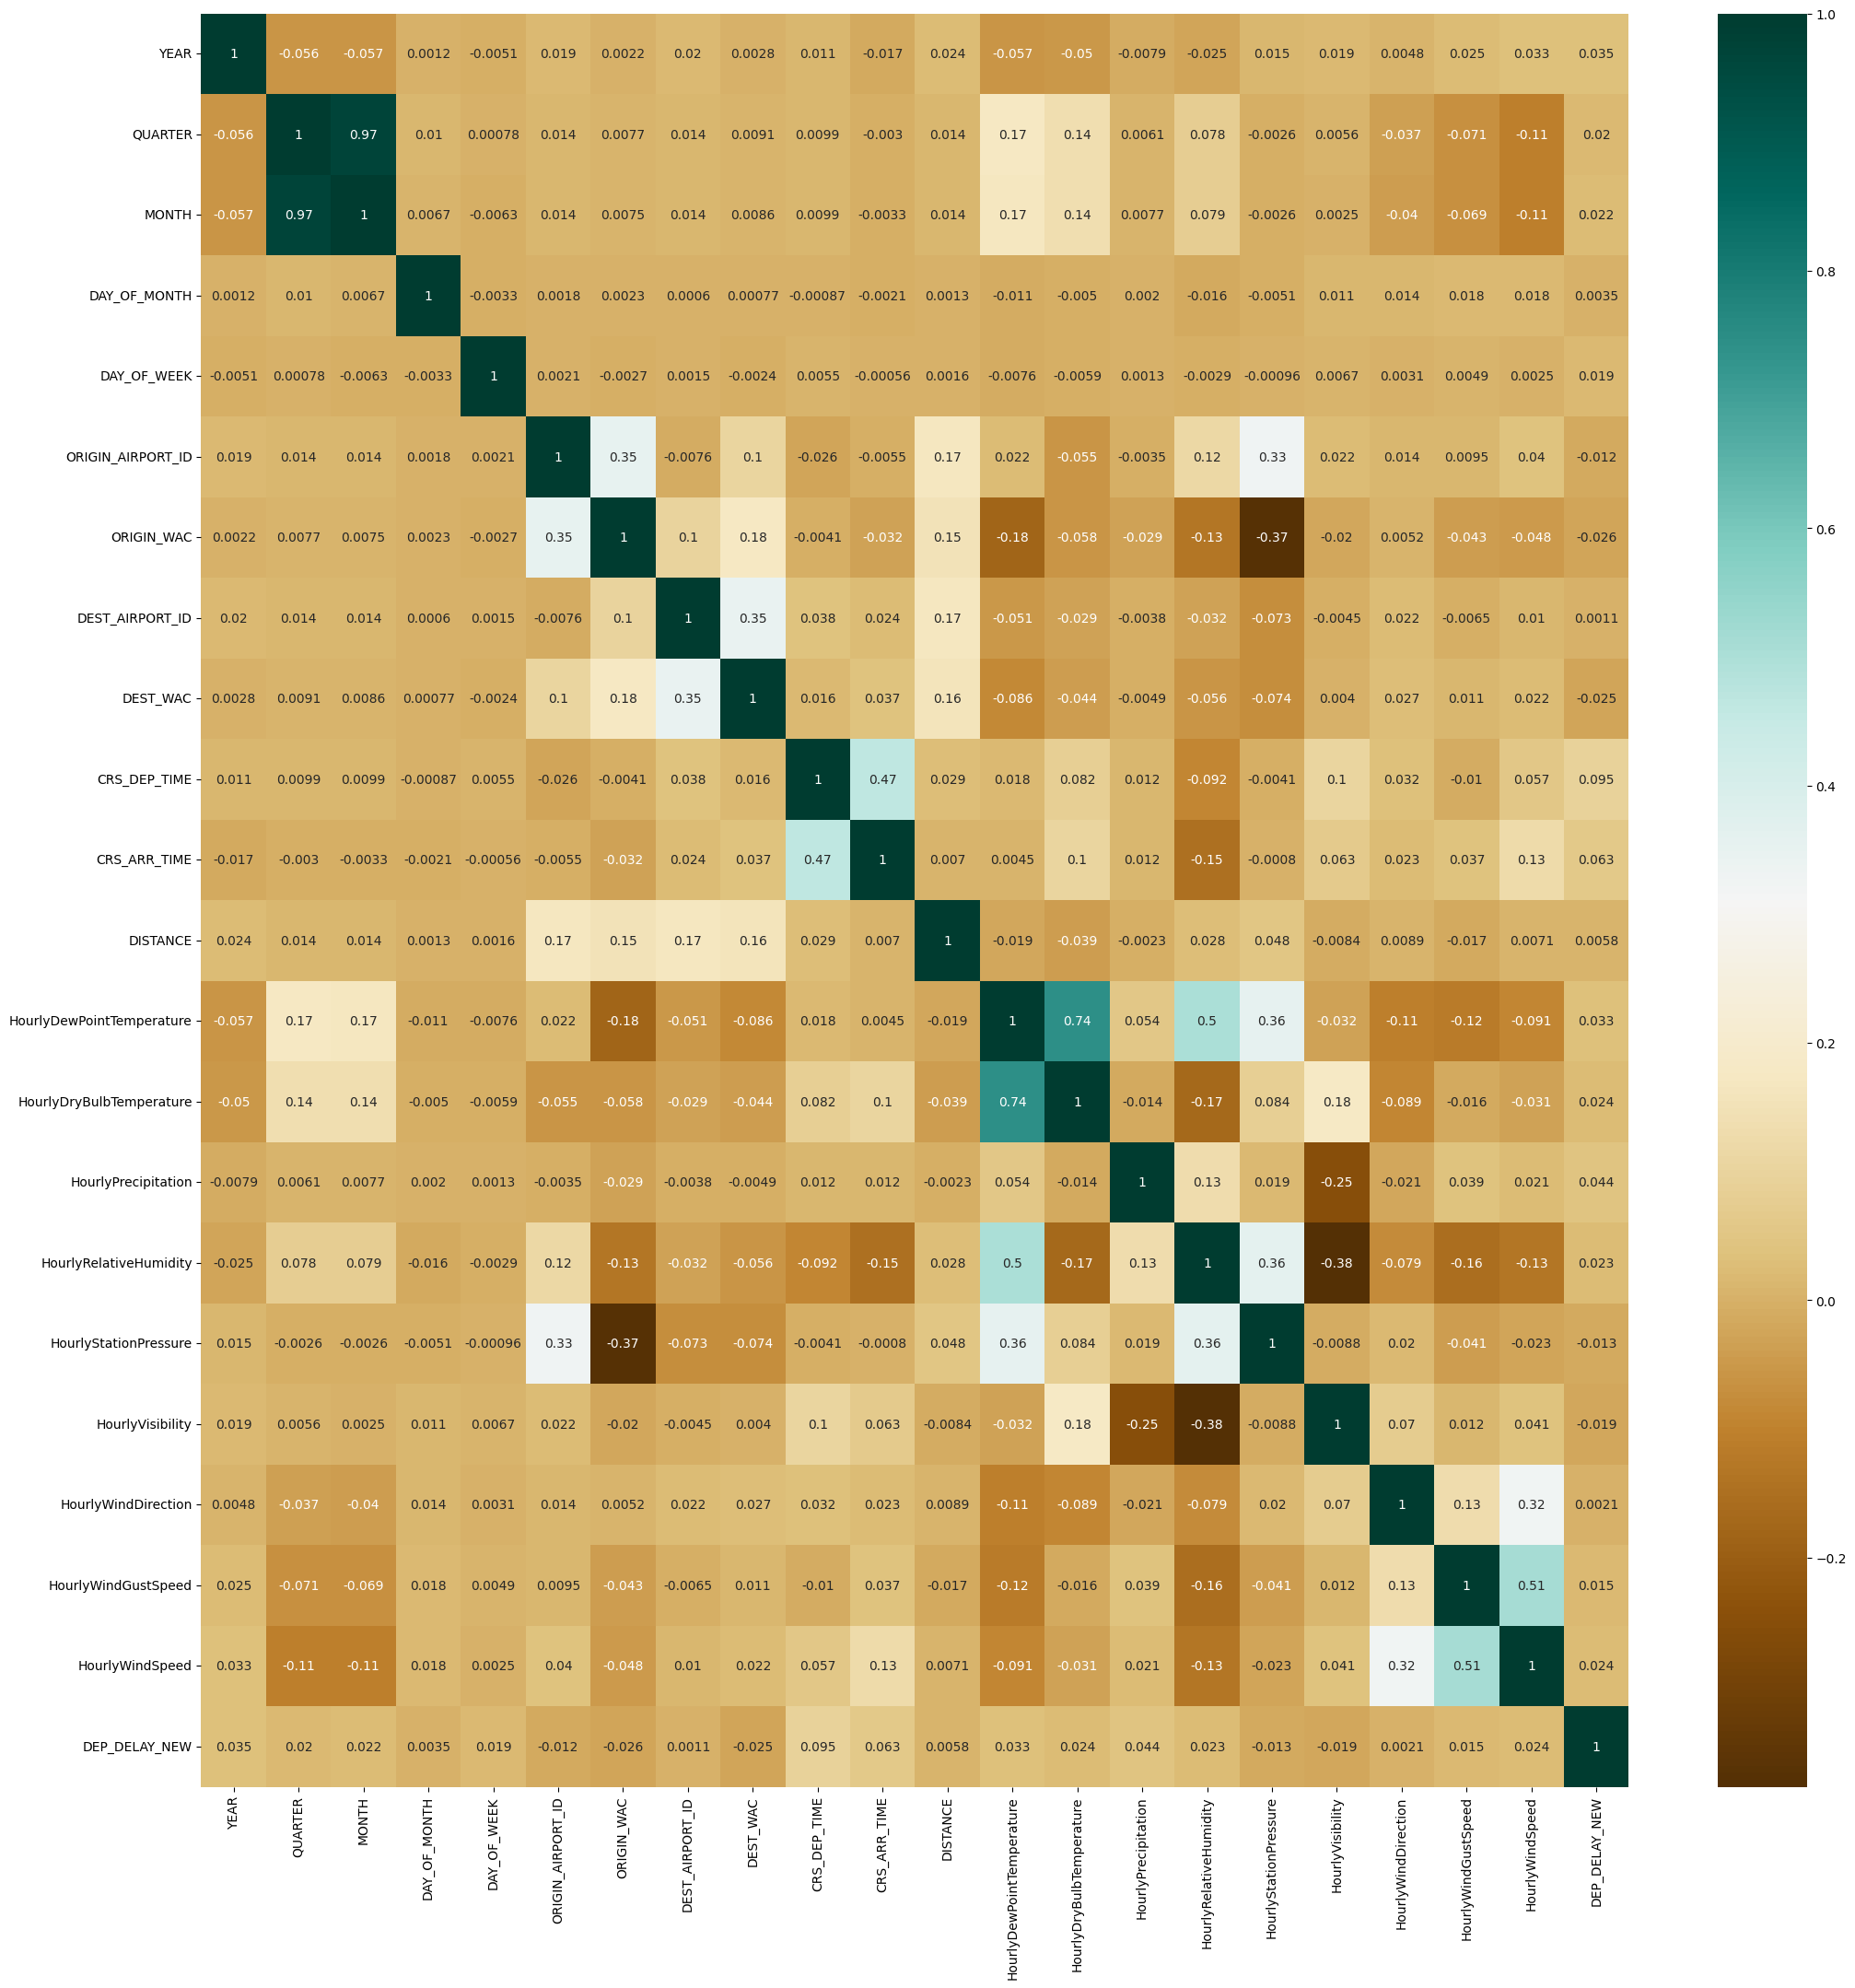

In [24]:
correlation = data_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='BrBG').figure.set_size_inches(25, 25)

#### Drop Quarter due to high correllation with month, Drop Distance due to low correlation with dep delay new

In [25]:
data_numeric.drop(columns=['DISTANCE','QUARTER'], inplace=True)


In [27]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664122 entries, 0 to 1664121
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YEAR                       1664122 non-null  int64  
 1   MONTH                      1664122 non-null  int64  
 2   DAY_OF_MONTH               1664122 non-null  int64  
 3   DAY_OF_WEEK                1664122 non-null  int64  
 4   ORIGIN_AIRPORT_ID          1664122 non-null  int64  
 5   ORIGIN_WAC                 1664122 non-null  int64  
 6   DEST_AIRPORT_ID            1664122 non-null  int64  
 7   DEST_WAC                   1664122 non-null  int64  
 8   CRS_DEP_TIME               1664122 non-null  int64  
 9   CRS_ARR_TIME               1664122 non-null  int64  
 10  HourlyDewPointTemperature  1664122 non-null  float64
 11  HourlyDryBulbTemperature   1664122 non-null  float64
 12  HourlyPrecipitation        1664122 non-null  float64
 13  HourlyRelati

#### Write data to hopsworks

In [28]:
import hopsworks
project = hopsworks.login()
fs = project.get_feature_store()

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/194714
Connected. Call `.close()` to terminate connection gracefully.


In [29]:
column_list = data_numeric.columns.tolist()
print(column_list[:-1])
primary_key_list=column_list[:-1]

['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_WAC', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed']


In [31]:
flight_data_fg = fs.get_or_create_feature_group(
     name="flight_data_v2",
     version=1,
     primary_key=primary_key_list, 
     description="flight dataset")
flight_data_fg.insert(data_numeric)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/194714/fs/194633/fg/374094


Uploading Dataframe: 100.00% |██████████| Rows 1664122/1664122 | Elapsed Time: 02:43 | Remaining Time: 00:00


Launching job: flight_data_v2_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/194714/jobs/named/flight_data_v2_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f1287368c10>, None)

: 